In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indias-fast-delivery-agents-reviews-and-ratings/Fast Delivery Agent Reviews.csv


In [2]:
df = pd.read_csv("/kaggle/input/indias-fast-delivery-agents-reviews-and-ratings/Fast Delivery Agent Reviews.csv")

In [3]:
df.head()

,Agent Name,Rating,Review Text,Delivery Time (min),Location,Order Type,Customer Feedback Type,Price Range,Discount Applied,Product Availability,Customer Service Rating,Order Accuracy
0,Zepto,4.5,Purpose boy job cup decision girl now get job ...,58,Delhi,Essentials,Neutral,High,Yes,Out of Stock,4,Incorrect
1,Zepto,2.1,Prevent production able both the box school wa...,25,Lucknow,Grocery,Negative,Low,No,Out of Stock,2,Correct
2,JioMart,4.5,Family station listen agreement more kitchen l...,54,Ahmedabad,Essentials,Neutral,Low,No,Out of Stock,3,Correct
3,JioMart,2.6,World north people area everything enter beyon...,22,Chennai,Essentials,Neutral,Low,Yes,In Stock,1,Incorrect
4,Zepto,3.6,Hand way yourself tax whether sister anyone ef...,34,Pune,Pharmacy,Positive,High,No,In Stock,2,Incorrect


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Agent Name               5000 non-null   object 
 1   Rating                   5000 non-null   float64
 2   Review Text              5000 non-null   object 
 3   Delivery Time (min)      5000 non-null   int64  
 4   Location                 5000 non-null   object 
 5   Order Type               5000 non-null   object 
 6   Customer Feedback Type   5000 non-null   object 
 7   Price Range              5000 non-null   object 
 8   Discount Applied         5000 non-null   object 
 9   Product Availability     5000 non-null   object 
 10  Customer Service Rating  5000 non-null   int64  
 11  Order Accuracy           5000 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 468.9+ KB


In [5]:
# Contar a frequência de cada nota para cada entregador
rating_counts = df.groupby(['Agent Name', 'Rating']).size().reset_index(name='Frequency')

# Exibir o resultado
print(rating_counts)

    Agent Name  Rating  Frequency
0      Blinkit     1.0         22
1      Blinkit     1.1         40
2      Blinkit     1.2         28
3      Blinkit     1.3         28
4      Blinkit     1.4         32
..         ...     ...        ...
159      Zepto     4.6         33
160      Zepto     4.7         32
161      Zepto     4.8         30
162      Zepto     4.9         33
163      Zepto     5.0         16

[164 rows x 3 columns]


In [6]:
agent_ratings = df.groupby('Agent Name')['Rating'].mean().reset_index()

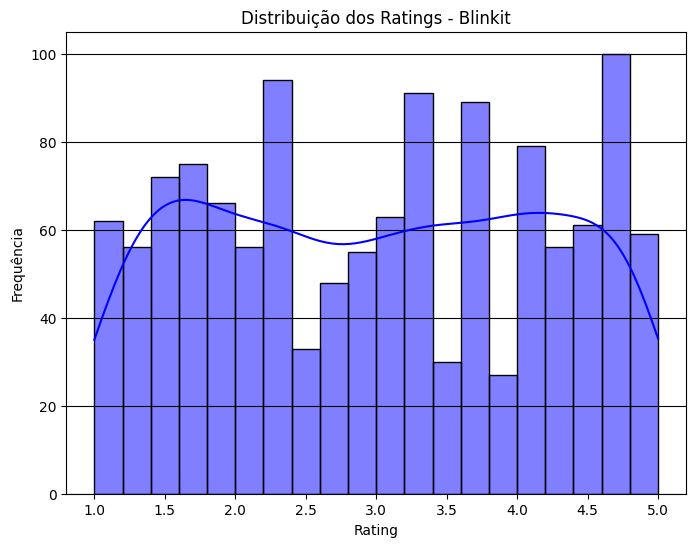

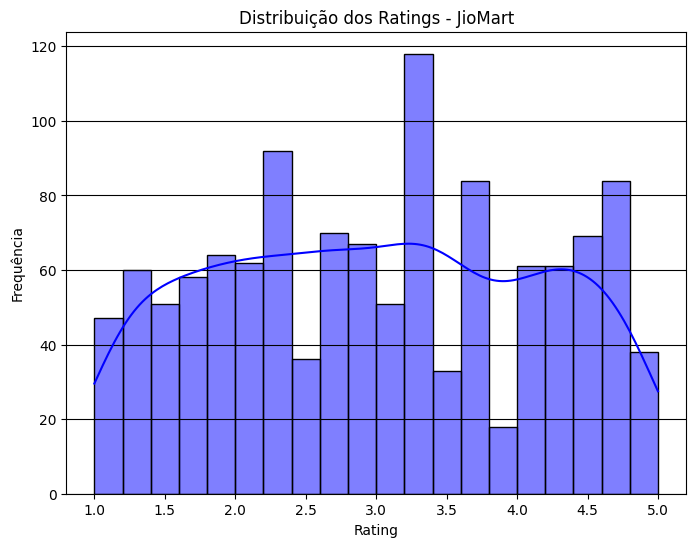

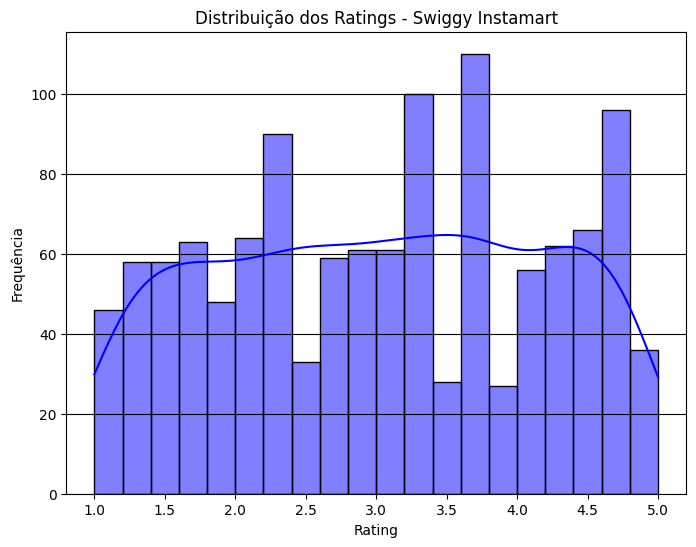

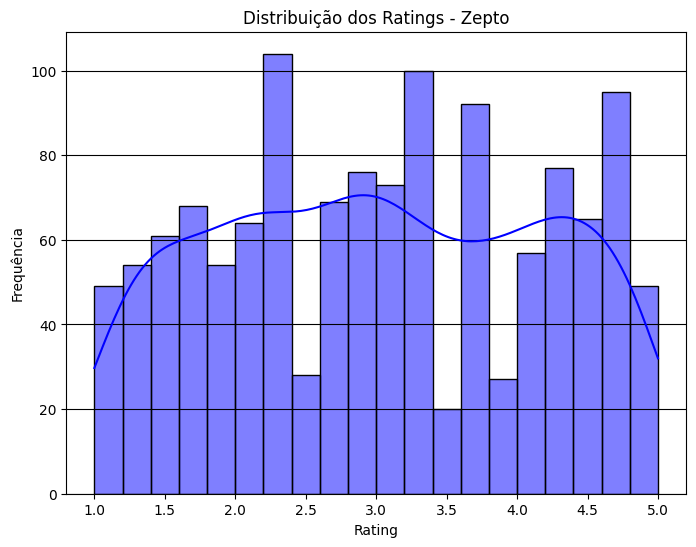

In [7]:
# Plotar gráfico individual para cada entregador
for agent in agent_ratings['Agent Name']:
    # Filtrar as avaliações do entregador específico
    agent_data = df[df['Agent Name'] == agent]
    
    # Plotar o histograma para o entregador
    plt.figure(figsize=(8, 6))
    sns.histplot(agent_data['Rating'], kde=True, bins=20, color='blue')
    plt.title(f'Distribuição dos Ratings - {agent}')
    plt.xlabel('Rating')
    plt.ylabel('Frequência')
    plt.grid(axis='y', color='black')
    plt.show()

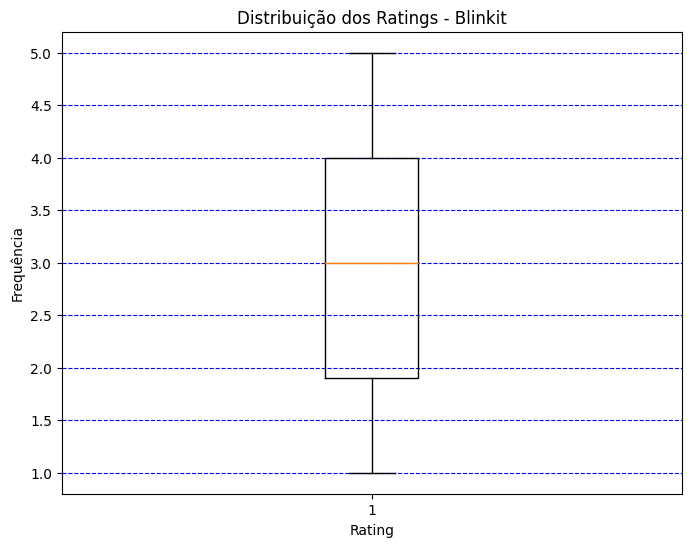

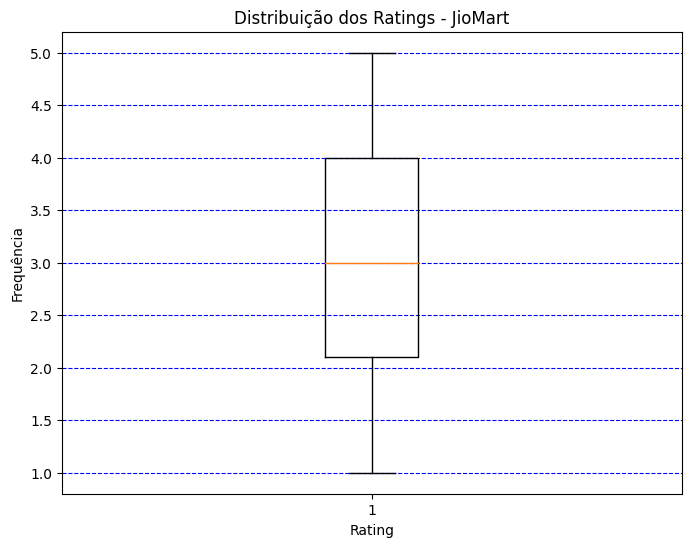

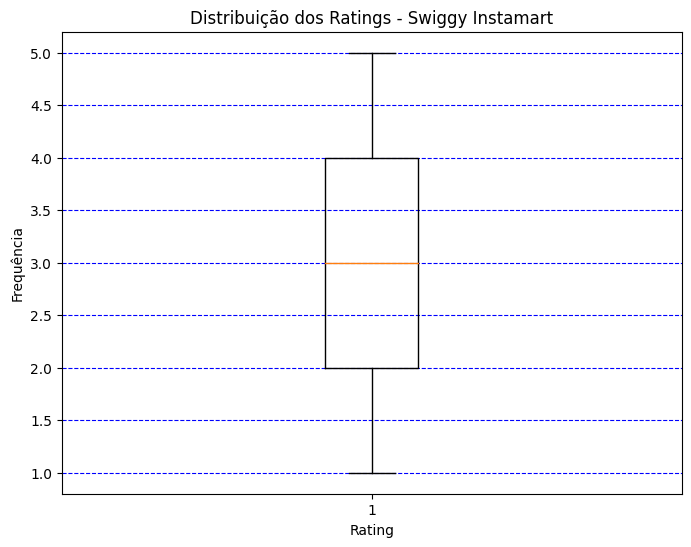

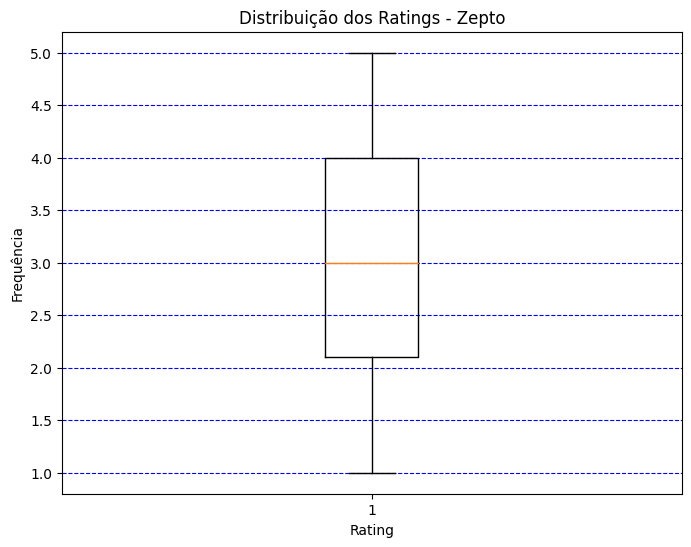

In [8]:
# Plotar gráfico individual para cada entregador
for agent in agent_ratings['Agent Name']:
    # Filtrar as avaliações do entregador específico
    agent_data = df[df['Agent Name'] == agent]
    
    # Plotar o histograma para o entregador
    plt.figure(figsize=(8, 6))
    plt.boxplot(agent_data['Rating'])
    plt.title(f'Distribuição dos Ratings - {agent}')
    plt.xlabel('Rating')
    plt.ylabel('Frequência')
    plt.grid(axis='y', color='blue', linestyle='--')
    plt.show()

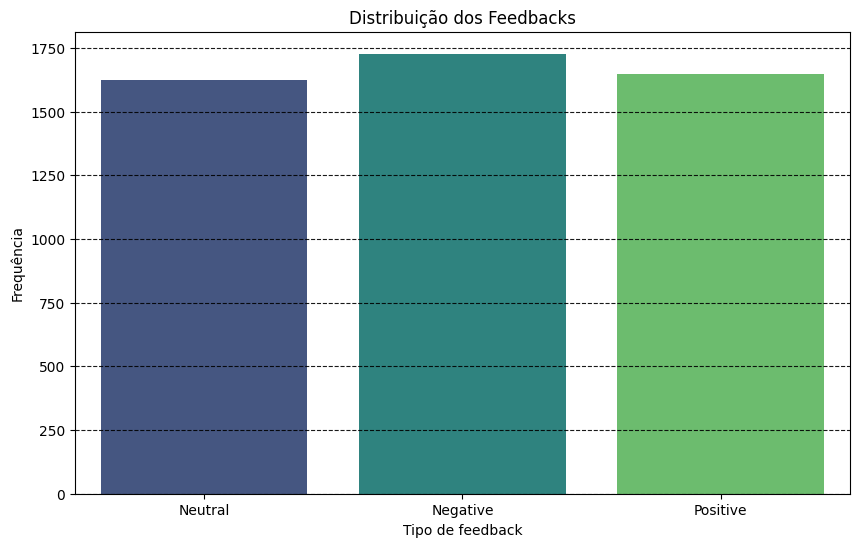

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Customer Feedback Type', palette='viridis')
plt.title('Distribuição dos Feedbacks')
plt.xlabel('Tipo de feedback')
plt.ylabel('Frequência')
plt.grid(axis = 'y', linestyle='--', color='black', alpha=0.9)
plt.show()

In [10]:
qtd_fed = df['Customer Feedback Type'].value_counts().reset_index(name='Frequency')
qtd_fed.columns = ['Customer Feedback Type', 'Frequency']
qtd_fed

,Customer Feedback Type,Frequency
0,Negative,1727
1,Positive,1648
2,Neutral,1625
